In [1]:
import visualization_tools as vt
import generator as gen
import numpy as np
from dataset import CoronalFieldDataset
from matplotlib import pyplot as plt
import models
import torch
import dataset

/home/ubuntu/micromamba/envs/coronal-diffusion-modeling/lib/python3.12/site-packages/ai/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:

def read_sh_coefficients(dataset_path, index):
    ds = CoronalFieldDataset(dataset_path)
    arr = ds[index]
    nmax = 90

    H = np.zeros((nmax + 1, nmax + 1))
    G = np.zeros((nmax + 1, nmax + 1))

    G[np.triu_indices(nmax + 1)] = arr[:arr.shape[0]//2]
    H[np.triu_indices(nmax + 1)] = arr[arr.shape[0]//2:]

    G = G.T 
    H = H.T
    
    return G, H, nmax

Text(0.5, 1.0, '$B_r$ at r=1.05 $R_\\odot$- Sample from Training Data')

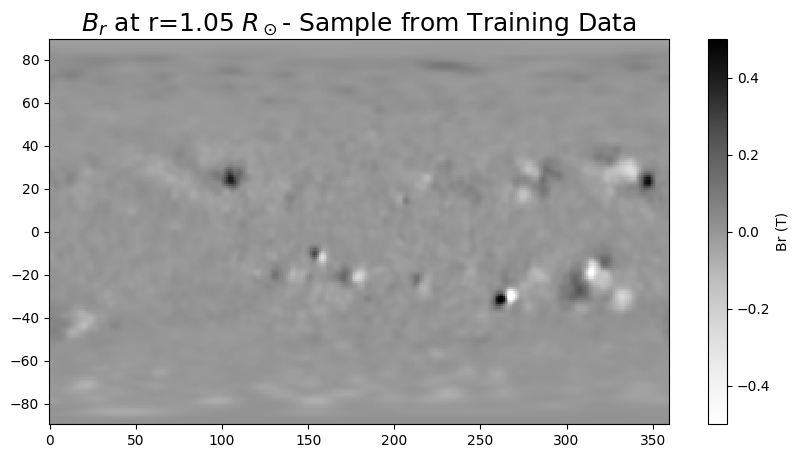

In [8]:
dataset_path = '/home/ubuntu/CoronalFieldExtrapolation/CoronalFieldExtrapolation_train/'
G, H, nmax = read_sh_coefficients(dataset_path, 900)


sh = vt.SHVisualizer(G, H, normalization='schmidt')  
#sh.visualize_field_lines(grid_density=20, r=1.1, closed_only=False)
sh.plot_magnetogram(lim=.5)
plt.title(plt.gca().get_title() + f'- Sample from Training Data', fontsize=18)

In [2]:
ds = dataset.CoronalFieldDatasetHDF('test_dataset.h5', 10)


torch.Size([7, 180, 360])


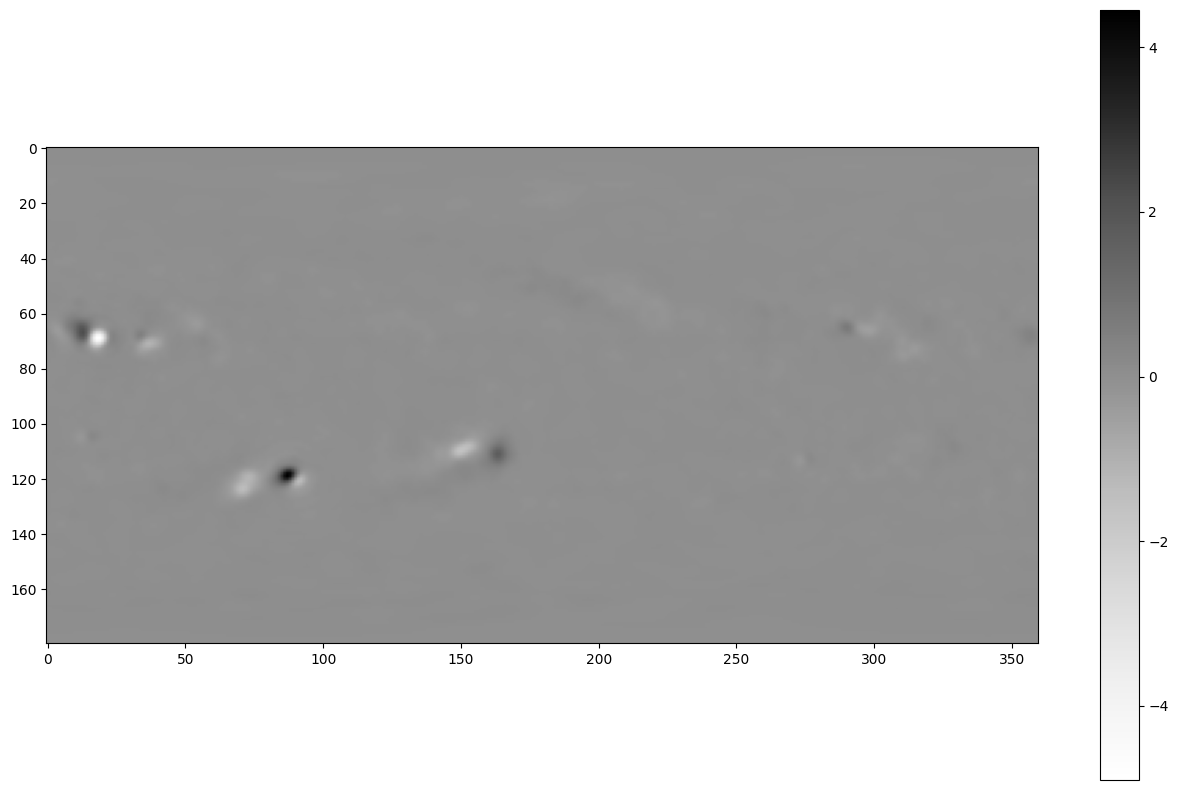

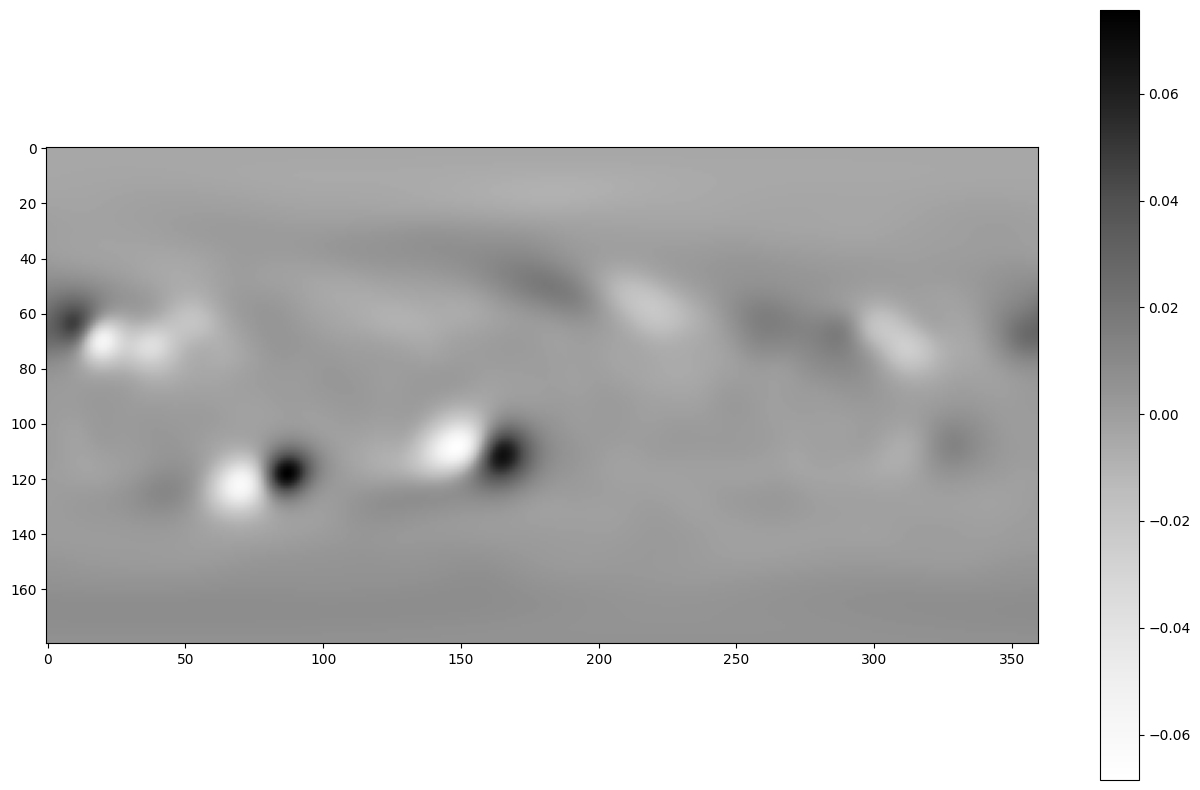

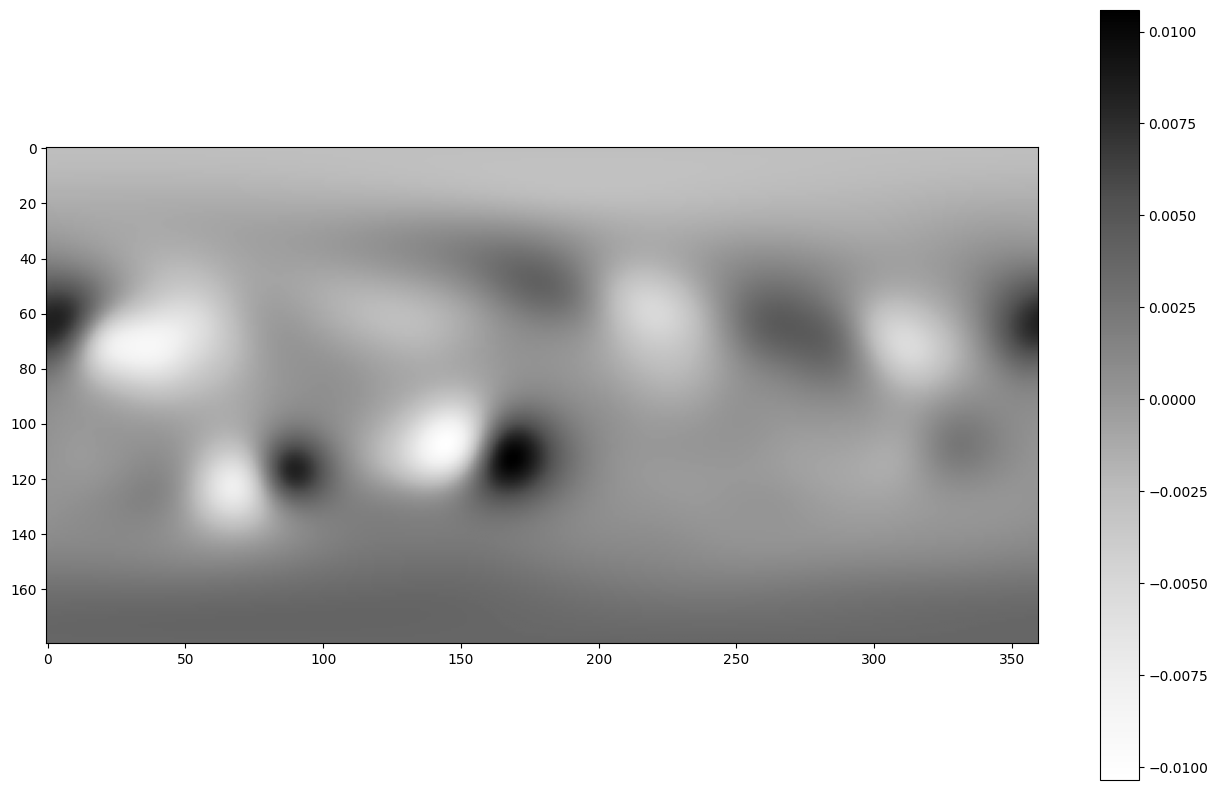

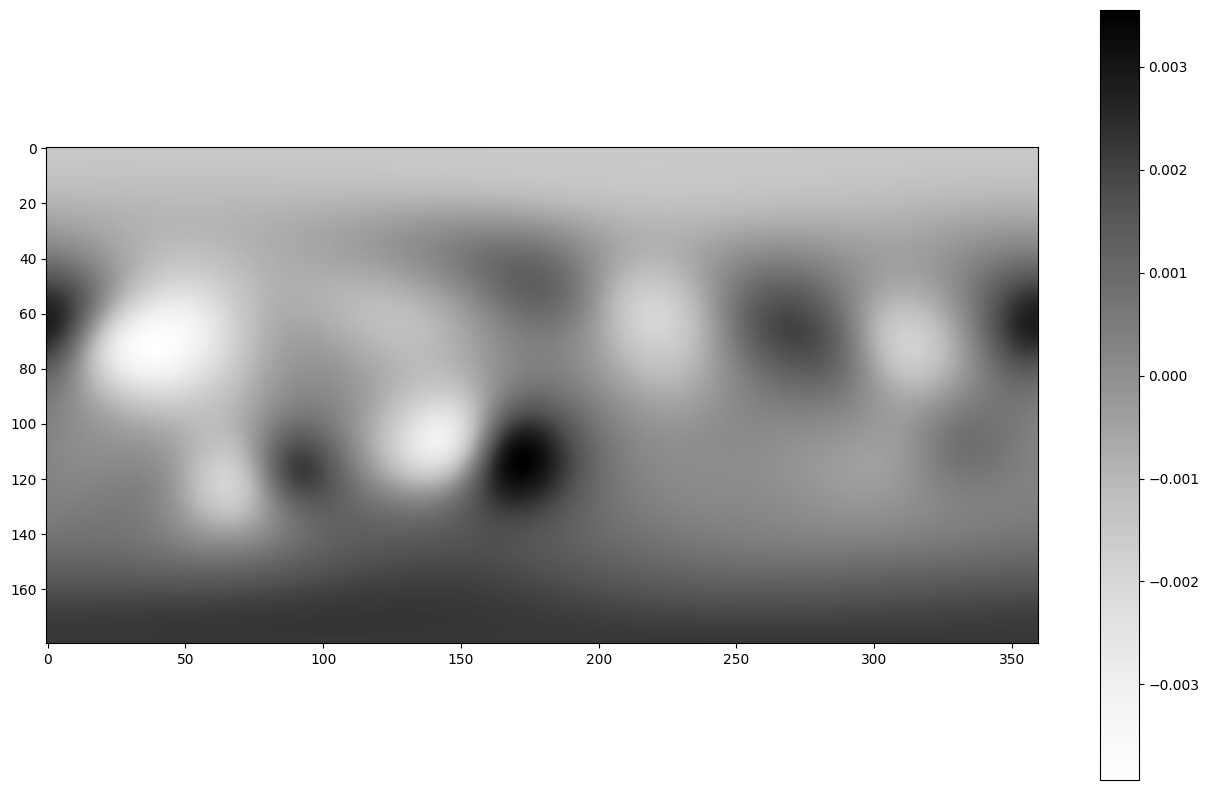

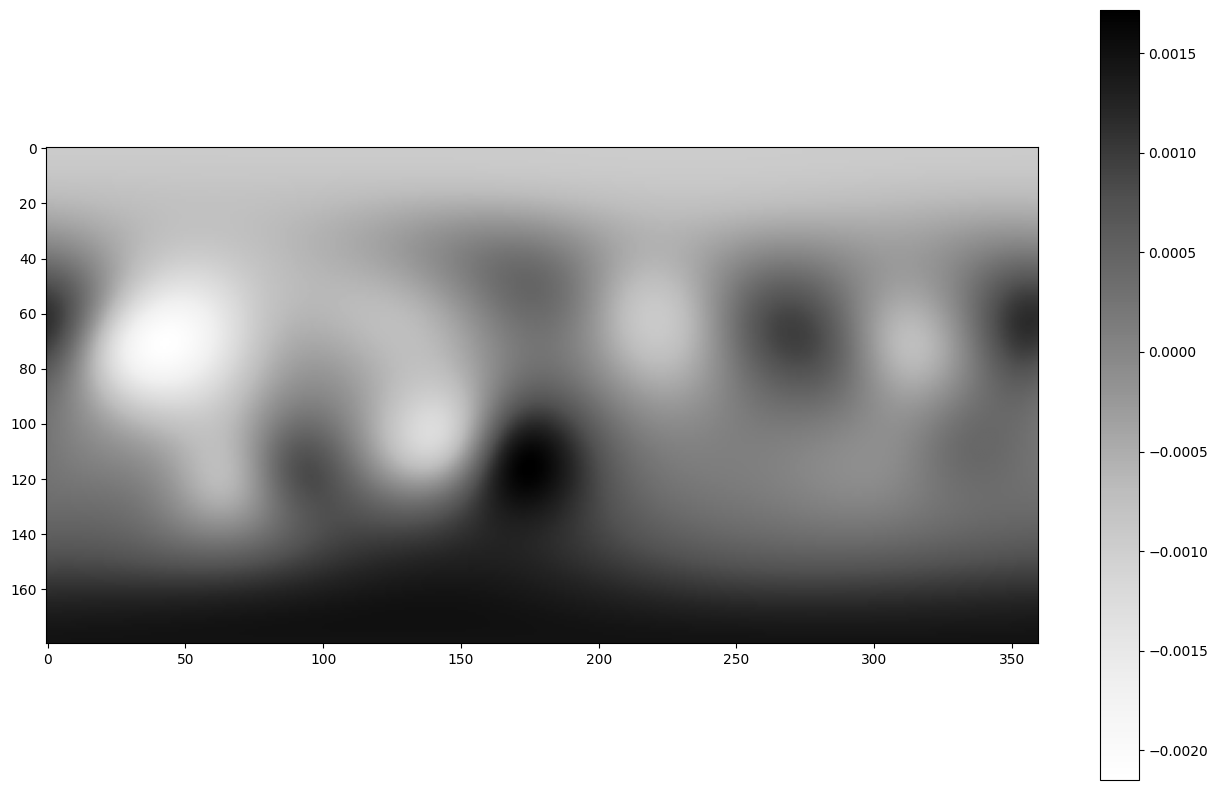

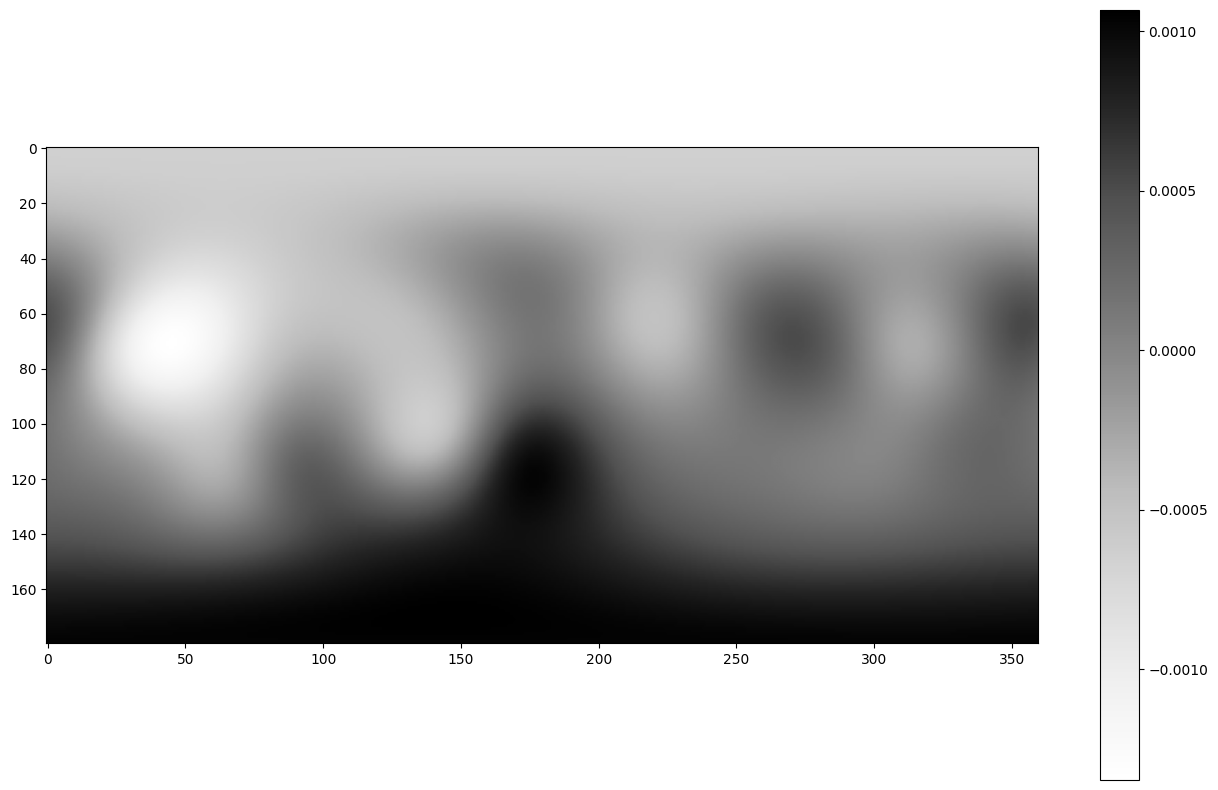

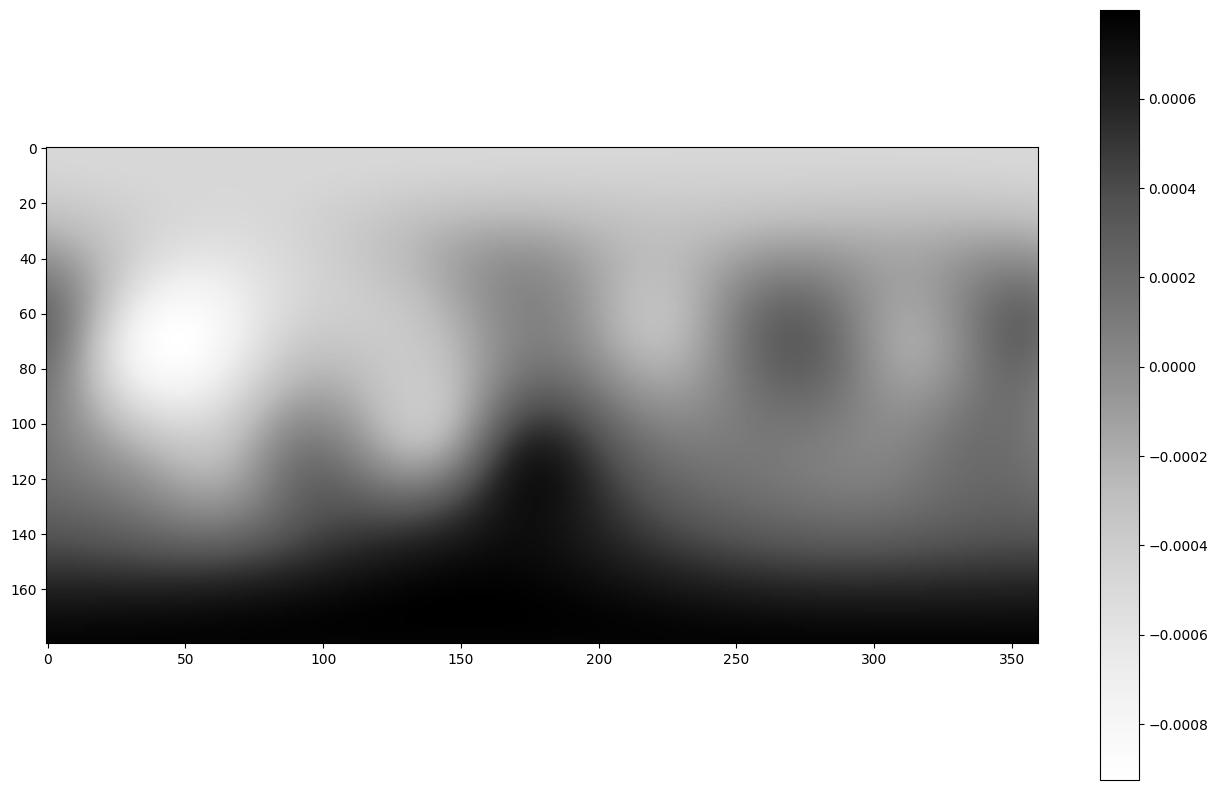

In [ ]:

out, _ = ds[5]

mag_model = models.MagnetogramModel()
mag = mag_model(out.unsqueeze(0)).squeeze() * 1e-5
print(mag.shape)

for i in range(mag.shape[0]):
    plt.figure(figsize=(16, 10))
    plt.imshow(mag[i] , cmap='Grays')
    plt.colorbar()

Text(0.5, 1.0, '$B_r$ at r=1 $R_\\odot$- Sample from Diffusion Model')

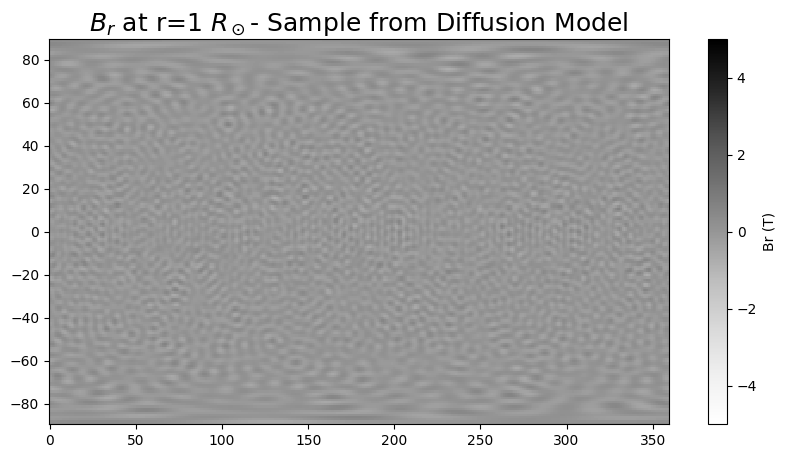

In [6]:
G, H = gen.sample(weights_file="checkpoints/magnetogram_8.pth", nsteps=10, radio_flux=1)
sh = vt.SHVisualizer(G, H)  
sh.plot_magnetogram(r=1)
plt.title(plt.gca().get_title() + f'- Sample from Diffusion Model', fontsize=18)